In [4]:
print("helo")

helo


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [7]:
# Simple Function to Get Zip from server

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [8]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [9]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

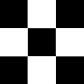

In [10]:
# Display 84x84 pixel image.
Image(filename="checkerboard_84x84.jpg")

In [14]:
raw_img  = cv2.imread('checkerboard_18x18.png',0)
print(raw_img) # 2d matrix 

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [16]:
print(raw_img.shape)
print(raw_img.dtype)

(18, 18)
uint8


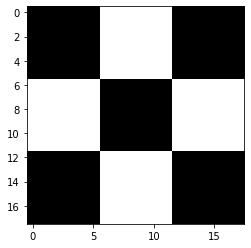

In [18]:
plt.imshow(raw_img,cmap='gray')

Text(0.5, 1.0, 'Merged Output')

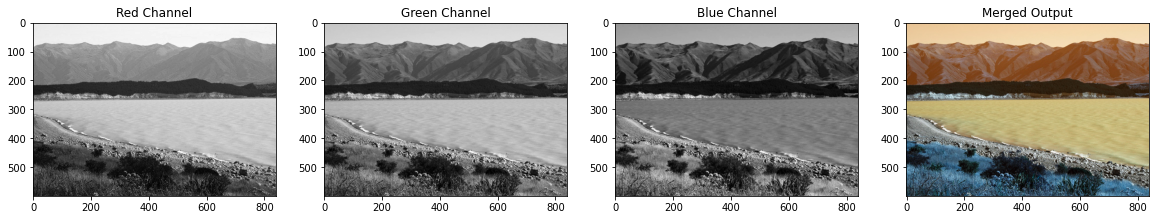

In [36]:
img = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
r,g,b = cv2.split(img)

plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")


# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")


[[[232 194 146]
  [232 194 146]
  [233 195 147]
  ...
  [244 212 169]
  [244 212 169]
  [243 211 168]]

 [[232 194 146]
  [233 195 147]
  [233 195 147]
  ...
  [244 212 169]
  [244 212 169]
  [244 212 169]]

 [[233 195 147]
  [233 195 147]
  [233 195 147]
  ...
  [245 213 170]
  [245 213 170]
  [245 213 170]]

 ...

 [[149 161 171]
  [105 120 129]
  [ 63  79  91]
  ...
  [ 56  97 122]
  [ 43  85 108]
  [ 45  87 110]]

 [[ 64  80  92]
  [ 97 115 126]
  [ 61  85  97]
  ...
  [ 63 104 127]
  [ 53  94 116]
  [ 46  87 109]]

 [[ 14  30  42]
  [ 92 114 125]
  [ 64  92 103]
  ...
  [ 64 105 128]
  [ 49  90 112]
  [ 28  68  87]]]


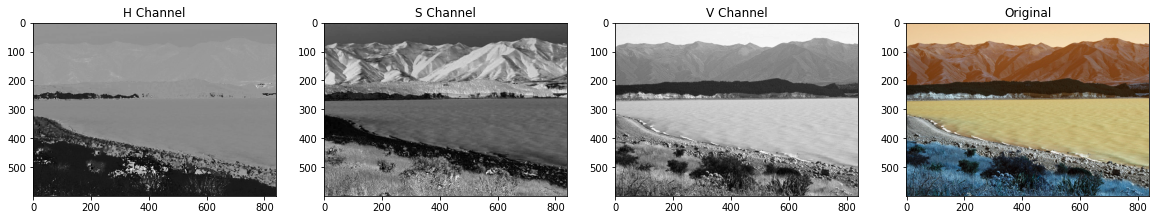

In [37]:
print(img) # which is bgr
# Converting into BG2 TO HSV

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img);   plt.title("Original");

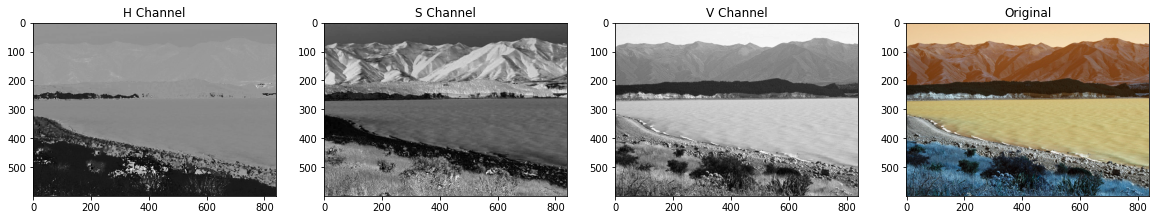

In [43]:
# will change saturation value and checking with orignal image

s_new = s * 100
img_NZ_merged = cv2.merge((h + 100 ,s_new, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img);   plt.title("Original");

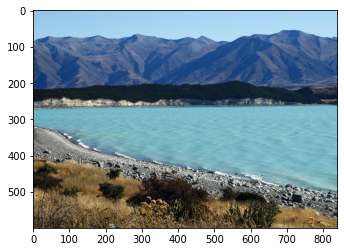

In [44]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
# Simply converting bgr to rgb
img_NZ_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

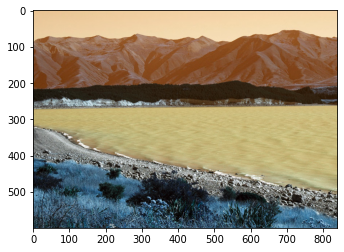

In [49]:
# writing simple 

# save the image
cv2.imwrite("img_operation.png", img_NZ_rgb)

val = plt.imread('img_operation.png',1) 
plt.imshow(val)